In [1]:
import pandas as pd
fw= pd.read_csv('C:/Users/hu612/Desktop/School/sooda/Project/팀과제/웅진/data/01_제공데이터_update(210811)/01_음식물쓰레기_FOOD_WASTE_210811_update.csv',encoding='cp949')
kor = pd.read_csv('C:/Users/hu612/Desktop/School/sooda/Project/팀과제/웅진/data/01_제공데이터_update(210811)/제거_data/kor.csv')
ltf = pd.read_csv('C:/Users/hu612/Desktop/School/sooda/Project/팀과제/웅진/data/01_제공데이터_update(210811)/제거_data/ltf.csv')
stf = pd.read_csv('C:/Users/hu612/Desktop/School/sooda/Project/팀과제/웅진/data/01_제공데이터_update(210811)/제거_data/stf.csv')
rp = pd.read_csv('C:/Users/hu612/Desktop/School/sooda/Project/팀과제/웅진/data/01_제공데이터_update(210811)/제거_data/rp.csv')
cs = pd.read_csv('C:/Users/hu612/Desktop/School/sooda/Project/팀과제/웅진/data/01_제공데이터_update(210811)/제거_data/cs.csv')

C:\Users\hu612\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
fw = fw.rename({'base_date':'일자',
                'city':'시 구분',
                'emd_cd':'행정동 코드',
                'emd_nm':'행정동명',
                'em_area_cd':'배출거점지역 코드',
                'em_cnt':'배출건수',
                'em_g':'배출량',
                'pay_amt':'총 지불금액'},axis='columns')

In [3]:
fw.isnull().sum()

일자           0
시 구분         0
행정동 코드       0
행정동명         0
배출거점지역 코드    0
배출건수         0
배출량          0
총 지불금액       0
dtype: int64

'구좌읍', '조천읍', '한경면', '한림읍', '알수없음'

In [4]:
kor = kor.drop(['Unnamed: 0'],axis=1)
kor = kor.rename({'base_date':'일자',
                  'time':'시간',
                  'city':'시 구분',
                  'emd_cd':'행정동 코드',
                  'emd_nm':'행정동명',
                  'sex':'성별',
                  'age':'연령대',
                  'resd_pop_cnt':'거주인구',
                  'work_pop_cnt':'근무인구',
                  'visit_pop_cnt':'방문인구',
                  'resd':'거주지역행정구역'},axis='columns')

In [5]:
ltf = ltf.drop(['Unnamed: 0'],axis=1)
ltf = ltf.rename({'base_date':'일자',
                  'time':'시간',
                  'nationality':'국적',
                  'city':'시 구분',
                  'emd_cd':'행정동 코드',
                  'emd_nm':'행정동명',
                  'resd_pop_cnt':'거주인구',
                  'work_pop_cnt':'근무인구',
                  'visit_pop_cnt':'장기 방문인구',
                  'resd':'거주지역행정구역'},axis='columns')

In [6]:
stf = stf.drop(['Unnamed: 0'],axis=1)
stf = stf.rename({'base_date':'일자',
                  'time':'시간',
                  'nationality':'국적',
                  'city':'시 구분',
                  'emd_cd':'행정동 코드',
                  'emd_nm':'행정동명',
                  'visit_pop_cnt':'단기 방문인구'},axis='columns')

In [7]:
rp = rp.drop(['Unnamed: 0'],axis=1)
rp = rp.rename({'base_date':'일자',
                'base_year':'년',
                'base_month':'월',
                'city':'시 구분',
                'emd_cd':'행정동 코드',
                'emd_nm':'행정동명',
                'sex':'성별',
                'resid_reg_pop':'주민등록 거주인구',
                'foreign_pop':'외국인 거주인구',
                'total_pop':'총 거주인구'},axis='columns')

In [8]:
cs = cs.drop(['Unnamed: 0'],axis=1)
cs = cs.rename({'base_date':'일자', 
                'city':'시 구분',
                'emd_cd':'행정동 코드',
                'emd_nm':'행정동명',
                'mct_cat_cd':'업종 코드',
                'mct_cat_nm':'업종명',
                'use_cnt':'결제건수',
                'use_amt':'결제금액'},axis='columns')

In [9]:
fw['YYYY-MM'] = fw['일자'].str[0:7]

In [10]:
fwm = fw.groupby(['YYYY-MM','행정동명']).mean().reset_index()
fwm.shape

(1666, 5)

'구좌읍', '조천읍', '한경면', '한림읍', '알수없음'

In [11]:
cs['YYYY-MM'] =  cs['일자'].str[0:7]

In [12]:
cs

,일자,시 구분,행정동 코드,행정동명,업종 코드,업종명,결제건수,결제금액,YYYY-MM
0,2018-01-06,제주시,50110650,연동,C00100,한식,3643,127777300,2018-01
1,2018-01-09,제주시,50110650,연동,C00500,패스트푸드,432,6711675,2018-01
2,2018-01-15,제주시,50110650,연동,C01200,농축수산물,236,16089579,2018-01
3,2018-01-15,제주시,50110650,연동,A00200,마트/슈퍼마켓,4031,121979867,2018-01
4,2018-01-20,제주시,50110650,연동,C01000,식품,633,30410674,2018-01
...,...,...,...,...,...,...,...,...,...
530613,2020-10-16,제주시,XXXXXXXX,알수없음,C01400,배달,5,127250,2020-10
530614,2019-08-31,서귀포시,XXXXXXXX,알수없음,C01400,배달,5,39974,2019-08
530615,2020-10-03,서귀포시,XXXXXXXX,알수없음,C01400,배달,10,329832,2020-10
530616,2020-10-23,서귀포시,XXXXXXXX,알수없음,C01400,배달,5,68715,2020-10


In [13]:
csm = cs.groupby(['YYYY-MM','행정동명']).mean().reset_index()
csm.shape

(1764, 4)

In [14]:
csm

,YYYY-MM,행정동명,결제건수,결제금액
0,2018-01,건입동,183.120635,6.427583e+06
1,2018-01,구좌읍,133.570447,4.938732e+06
2,2018-01,남원읍,164.892617,6.303016e+06
3,2018-01,노형동,1192.813814,3.694071e+07
4,2018-01,대륜동,209.764516,7.788714e+06
...,...,...,...,...
1759,2021-06,표선면,140.762887,5.087587e+06
1760,2021-06,한경면,106.687943,3.887469e+06
1761,2021-06,한림읍,290.491409,1.062151e+07
1762,2021-06,화북동,540.041935,1.607200e+07


In [15]:
csfw = pd.merge(csm,fwm,how='outer',on=['행정동명','YYYY-MM'])

In [16]:
rp1 = rp[(rp['월'] < 10)]
rp1['월'] = rp1['월'].astype('str')
rp1['월'] =  "0" + rp1['월']

rp2 = rp[(rp['월'] >= 10)]

<ipython-input-16-3ed50b132d49>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rp1['월'] = rp1['월'].astype('str')
<ipython-input-16-3ed50b132d49>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rp1['월'] =  "0" + rp1['월']


In [17]:
rp = pd.concat([rp1,rp2])
rp['년'] = rp['년'].astype('str')
rp['월'] = rp['월'].astype('str')
rp['YYYY-MM'] = rp['년']+'-'+rp['월']

In [18]:
rp =rp.drop(['년'],axis=1)
rp =rp.drop(['월'],axis=1)

In [19]:
rpm = rp.groupby(['YYYY-MM','행정동명']).mean().reset_index()
rpm.shape

(1722, 6)

In [20]:
rpfw = pd.merge(rpm,fwm,how='outer',on=['행정동명','YYYY-MM'])

In [21]:
rp[rp['행정동명']=='알수없음']

,시 구분,행정동 코드,행정동명,성별,주민등록 거주인구,외국인 거주인구,총 거주인구,YYYY-MM


In [22]:
rpfw[rpfw['행정동명']=='알수없음']

,YYYY-MM,행정동명,행정동 코드,주민등록 거주인구,외국인 거주인구,총 거주인구,배출건수,배출량,총 지불금액
1722,2018-01,알수없음,NaN,NaN,NaN,NaN,11.903226,95493.548387,2861.860215
1723,2018-02,알수없음,NaN,NaN,NaN,NaN,11.309524,89808.928571,2691.547619
1724,2018-03,알수없음,NaN,NaN,NaN,NaN,12.846154,102056.593407,3058.516484
1725,2018-04,알수없음,NaN,NaN,NaN,NaN,14.500000,109481.666667,3280.733333
1726,2018-05,알수없음,NaN,NaN,NaN,NaN,17.808989,115628.651685,3464.370787
1727,2018-06,알수없음,NaN,NaN,NaN,NaN,19.955556,117033.888889,3506.000000
1728,2018-07,알수없음,NaN,NaN,NaN,NaN,22.282609,128915.217391,3862.021739
1729,2018-08,알수없음,NaN,NaN,NaN,NaN,24.152174,132438.586957,3966.771739
1730,2018-09,알수없음,NaN,NaN,NaN,NaN,18.235294,106892.352941,3202.470588
1731,2018-10,알수없음,NaN,NaN,NaN,NaN,16.648352,102987.362637,3085.505495


In [23]:
csrpfw = pd.merge(csfw,rpfw,how='outer',on=['행정동명','YYYY-MM'])
csrpfw

,YYYY-MM,행정동명,결제건수,결제금액,배출건수_x,배출량_x,총 지불금액_x,행정동 코드,주민등록 거주인구,외국인 거주인구,총 거주인구,배출건수_y,배출량_y,총 지불금액_y
0,2018-01,건입동,183.120635,6.427583e+06,20.738739,51403.772523,1536.941441,50110590.0,4900.0,114.0,5014.0,20.738739,51403.772523,1536.941441
1,2018-01,구좌읍,133.570447,4.938732e+06,NaN,NaN,NaN,50110256.0,7787.0,276.0,8063.0,NaN,NaN,NaN
2,2018-01,남원읍,164.892617,6.303016e+06,7.184685,31860.135135,954.033784,50130253.0,9556.0,314.0,9870.0,7.184685,31860.135135,954.033784
3,2018-01,노형동,1192.813814,3.694071e+07,25.213448,58619.420482,1743.715992,50110660.0,26684.5,794.5,27479.0,25.213448,58619.420482,1743.715992
4,2018-01,대륜동,209.764516,7.788714e+06,27.390645,72835.145386,2119.911504,50130590.0,6736.5,89.0,6825.5,27.390645,72835.145386,2119.911504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1759,2021-06,표선면,140.762887,5.087587e+06,10.387440,41018.115942,1228.424155,50130320.0,6173.5,167.0,6340.5,10.387440,41018.115942,1228.424155
1760,2021-06,한경면,106.687943,3.887469e+06,4.367047,14714.600326,440.401305,50110310.0,4579.0,168.5,4747.5,4.367047,14714.600326,440.401305
1761,2021-06,한림읍,290.491409,1.062151e+07,8.180166,26386.157526,789.633929,50110250.0,10616.0,1615.0,12231.0,8.180166,26386.157526,789.633929
1762,2021-06,화북동,540.041935,1.607200e+07,33.193370,55625.339026,1660.486690,50110600.0,12150.0,165.0,12315.0,33.193370,55625.339026,1660.486690


In [24]:
del csrpfw['배출건수_y']
del csrpfw['배출량_y']
del csrpfw['총 지불금액_y']

csrpfw = csrpfw.rename({'배출건수_x':'배출건수',
                       '배출량_x':'배출량',
                       '총 지불금액_x':'총 지불금액'})

In [25]:
csrpfw.shape

(1764, 11)

In [26]:
ans = pd.read_excel("C:/Users/hu612/Desktop/School/sooda/Project/팀과제/웅진/data/02_평가데이터_update(210806)/2021_빅콘테스트_데이터분석분야_퓨처스리그_ECO제주_평가데이터_210806_update.xlsx")#,encoding='cp949')

ans['읍면동별 음식물 쓰레기 월 배출량'].unique()

array([nan, '행정동명', '한림읍', '애월읍', '구좌읍', '조천읍', '한경면', '일도1동', '일도2동',
       '이도1동', '이도2동', '삼도1동', '삼도2동', '용담1동', '용담2동', '건입동', '화북동',
       '삼양동', '봉개동', '아라동', '오라동', '연동', '노형동', '외도동', '이호동', '도두동',
       '대정읍', '남원읍', '성산읍', '안덕면', '표선면', '송산동', '정방동', '중앙동', '천지동',
       '효돈동', '영천동', '동홍동', '서홍동', '대륜동', '대천동', '중문동', '예래동', '알수없음'],
      dtype=object)

In [27]:
import numpy as np
ans_emd = np.array(['한림읍', '애월읍', '구좌읍', '조천읍', '한경면', '일도1동', '일도2동',
       '이도1동', '이도2동', '삼도1동', '삼도2동', '용담1동', '용담2동', '건입동', '화북동',
       '삼양동', '봉개동', '아라동', '오라동', '연동', '노형동', '외도동', '이호동', '도두동',
       '대정읍', '남원읍', '성산읍', '안덕면', '표선면', '송산동', '정방동', '중앙동', '천지동',
       '효돈동', '영천동', '동홍동', '서홍동', '대륜동', '대천동', '중문동', '예래동', '알수없음'])

In [28]:
ans_emd.shape

(42,)

In [29]:
csrpfw[csrpfw['YYYY-MM']=="2018-02"]['행정동명'].unique().shape

(42,)

In [30]:
ltf['YYYY-MM'] = ltf['일자'].str[0:7]

In [31]:
#ltf =ltf.drop(['시간','국적','시 구분','행정동 코드'],axis=1)
#ltf =ltf.drop(['일자'],axis=1)
ltfm = ltf.groupby(['YYYY-MM','행정동명','거주지역행정구역']).mean()

ltfm

시간      행정동 코드       거주인구      근무인구    장기 방문인구
YYYY-MM 행정동명 거주지역행정구역                                                       
2018-01 건입동  그외        12.496331  50110590.0   0.000000  0.827336  12.462147
             제주        12.631808  50110590.0  13.826490  1.795920   8.043542
        구좌읍  그외        12.443607  50110256.0   0.000000  3.858203  12.642223
             제주        12.592861  50110256.0  22.259365  0.983832   5.086778
        남원읍  그외        12.588660  50130253.0   0.000000  3.808728  15.454729
...                          ...         ...        ...       ...        ...
2021-06 한림읍  제주        12.506292  50110250.0  56.332333  2.501300  11.103812
        화북동  그외        13.047337  50110600.0   0.000000  0.000000   5.393416
             제주        12.579789  50110600.0  15.133700  1.847760   3.206691
        효돈동  그외        12.706161  50130550.0   0.000000  0.000000   5.108105
             제주        12.709240  50130550.0   6.401549  0.375352   2.229918

[3444 rows x 5 columns]

In [32]:
ltfm2 = ltfm.groupby(['YYYY-MM','행정동명']).sum().reset_index()

ltfm2

#del ltfm['Unnamed: 0']

,YYYY-MM,행정동명,시간,행정동 코드,거주인구,근무인구,장기 방문인구
0,2018-01,건입동,25.128139,100221180.0,13.826490,2.623255,20.505689
1,2018-01,구좌읍,25.036467,100220512.0,22.259365,4.842035,17.729001
2,2018-01,남원읍,25.329183,100260506.0,29.339954,4.656623,23.235490
3,2018-01,노형동,25.490293,100221320.0,100.672886,10.138620,42.181786
4,2018-01,대륜동,24.662384,100261180.0,11.999348,1.286292,19.460596
...,...,...,...,...,...,...,...
1717,2021-06,표선면,25.356499,100260640.0,11.653956,1.177887,10.948817
1718,2021-06,한경면,24.845544,100220620.0,16.890425,0.702056,27.844214
1719,2021-06,한림읍,25.145722,100220500.0,56.332333,3.823661,31.782092
1720,2021-06,화북동,25.627126,100221200.0,15.133700,1.847760,8.600107


In [33]:
ltfm2[ltfm2['YYYY-MM']=="2021-06"]['행정동명'].unique().shape

(41,)

In [34]:
stf['YYYY-MM'] = stf['일자'].str[0:7]

In [35]:
stf =stf.drop(['일자','시간','국적','시 구분','행정동 코드'],axis=1)
stfm = stf.groupby(['YYYY-MM','행정동명']).mean().reset_index()

stfm

,YYYY-MM,행정동명,단기 방문인구
0,2018-01,건입동,18.040378
1,2018-01,구좌읍,14.461103
2,2018-01,남원읍,55.173826
3,2018-01,노형동,43.686064
4,2018-01,대륜동,13.634790
...,...,...,...
1717,2021-06,표선면,0.985845
1718,2021-06,한경면,0.481637
1719,2021-06,한림읍,0.894318
1720,2021-06,화북동,0.408654


In [36]:
stfm[stfm['YYYY-MM']=="2018-01"]['행정동명'].unique() # 얘도 알 수 없음 없음

array(['건입동', '구좌읍', '남원읍', '노형동', '대륜동', '대정읍', '대천동', '도두동', '동홍동',
       '봉개동', '삼도1동', '삼도2동', '삼양동', '서홍동', '성산읍', '송산동', '아라동', '안덕면',
       '애월읍', '연동', '영천동', '예래동', '오라동', '외도동', '용담1동', '용담2동', '이도1동',
       '이도2동', '이호동', '일도1동', '일도2동', '정방동', '조천읍', '중문동', '중앙동', '천지동',
       '표선면', '한경면', '한림읍', '화북동', '효돈동'], dtype=object)

In [37]:
ltstfm = pd.merge(ltfm2, stfm, how = 'outer',on = ('YYYY-MM','행정동명'))

ltstfm

,YYYY-MM,행정동명,시간,행정동 코드,거주인구,근무인구,장기 방문인구,단기 방문인구
0,2018-01,건입동,25.128139,100221180.0,13.826490,2.623255,20.505689,18.040378
1,2018-01,구좌읍,25.036467,100220512.0,22.259365,4.842035,17.729001,14.461103
2,2018-01,남원읍,25.329183,100260506.0,29.339954,4.656623,23.235490,55.173826
3,2018-01,노형동,25.490293,100221320.0,100.672886,10.138620,42.181786,43.686064
4,2018-01,대륜동,24.662384,100261180.0,11.999348,1.286292,19.460596,13.634790
...,...,...,...,...,...,...,...,...
1717,2021-06,표선면,25.356499,100260640.0,11.653956,1.177887,10.948817,0.985845
1718,2021-06,한경면,24.845544,100220620.0,16.890425,0.702056,27.844214,0.481637
1719,2021-06,한림읍,25.145722,100220500.0,56.332333,3.823661,31.782092,0.894318
1720,2021-06,화북동,25.627126,100221200.0,15.133700,1.847760,8.600107,0.408654


In [38]:
ltstfm[ltstfm['행정동명'] == '알 수 없음']

,YYYY-MM,행정동명,시간,행정동 코드,거주인구,근무인구,장기 방문인구,단기 방문인구


In [39]:
all = pd.merge(csrpfw,ltstfm,how='outer',on=['행정동명','YYYY-MM'])

In [40]:
all = all.rename({'배출건수_x':'배출건수',
                       '배출량_x':'배출량',
                       '총 지불금액_x':'총 지불금액'}, axis='columns')

In [41]:
#del all['행정동 코드_y']
all = all.rename({'행정동 코드_x':'행정동 코드'},axis='columns')

In [42]:
all[(all['YYYY-MM']=='2018-01')&(all['행정동명']=='건입동')]

,YYYY-MM,행정동명,결제건수,결제금액,배출건수,배출량,총 지불금액,행정동 코드,주민등록 거주인구,외국인 거주인구,총 거주인구,시간,행정동 코드_y,거주인구,근무인구,장기 방문인구,단기 방문인구
0,2018-01,건입동,183.120635,6.427583e+06,20.738739,51403.772523,1536.941441,50110590.0,4900.0,114.0,5014.0,25.128139,100221180.0,13.82649,2.623255,20.505689,18.040378


In [43]:
all[all['YYYY-MM']=='2021-07']['행정동명'].unique()

array([], dtype=object)

In [44]:
#all[all['YYYY-MM']=='2018-02']['emd_nm'].unique()

In [45]:
all['YYYY-MM'].unique()

array(['2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06',
       '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12',
       '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06',
       '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12',
       '2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06',
       '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12',
       '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06'],
      dtype=object)

In [46]:
all.corr()['배출량'].sort_values()

거주인구        -0.124054
외국인 거주인구    -0.118588
총 거주인구      -0.106709
주민등록 거주인구   -0.104170
근무인구        -0.088967
결제건수        -0.073036
결제금액        -0.066506
단기 방문인구     -0.038674
장기 방문인구     -0.022830
시간           0.065211
행정동 코드       0.279991
행정동 코드_y     0.279991
배출건수         0.883764
총 지불금액       0.995635
배출량          1.000000
Name: 배출량, dtype: float64

In [47]:
all['코로나'] = 1

In [48]:
all.loc[((all['YYYY-MM']=='2018-01') | (all['YYYY-MM']=='2018-02')|(all['YYYY-MM']=='2018-03')|(all['YYYY-MM']=='2018-04')|(all['YYYY-MM']=='2018-05')|(all['YYYY-MM']=='2018-06')|(all['YYYY-MM']=='2018-07')|(all['YYYY-MM']=='2018-08')|(all['YYYY-MM']=='2018-09')|(all['YYYY-MM']=='2018-10')|(all['YYYY-MM']=='2018-11')|(all['YYYY-MM']=='2018-12')),'코로나'] = 0
all.loc[((all['YYYY-MM']=='2019-01') | (all['YYYY-MM']=='2019-02')|(all['YYYY-MM']=='2019-03')|(all['YYYY-MM']=='2019-04')|(all['YYYY-MM']=='2019-05')|(all['YYYY-MM']=='2019-06')|(all['YYYY-MM']=='2019-07')|(all['YYYY-MM']=='2019-08')|(all['YYYY-MM']=='2019-09')|(all['YYYY-MM']=='2019-10')|(all['YYYY-MM']=='2019-11')|(all['YYYY-MM']=='2019-12')),'코로나'] = 0

In [49]:
all['코로나'].unique()

array([0, 1], dtype=int64)

In [50]:
all.corr()['배출량'].sort_values()

거주인구        -0.124054
외국인 거주인구    -0.118588
총 거주인구      -0.106709
주민등록 거주인구   -0.104170
근무인구        -0.088967
결제건수        -0.073036
결제금액        -0.066506
코로나         -0.051318
단기 방문인구     -0.038674
장기 방문인구     -0.022830
시간           0.065211
행정동 코드       0.279991
행정동 코드_y     0.279991
배출건수         0.883764
총 지불금액       0.995635
배출량          1.000000
Name: 배출량, dtype: float64

In [51]:
all[all['YYYY-MM']=='2018-03']

,YYYY-MM,행정동명,결제건수,결제금액,배출건수,배출량,총 지불금액,행정동 코드,주민등록 거주인구,외국인 거주인구,총 거주인구,시간,행정동 코드_y,거주인구,근무인구,장기 방문인구,단기 방문인구,코로나
84,2018-03,건입동,193.967949,6.535422e+06,21.817773,52218.728909,1561.139483,50110590.0,4891.5,111.0,5002.5,25.376532,100221180.0,13.148550,2.758850,20.902275,21.831749,0
85,2018-03,구좌읍,138.334416,4.725374e+06,NaN,NaN,NaN,50110256.0,7798.0,276.0,8074.0,25.081295,100220512.0,22.893275,3.756852,17.204733,18.206555,0
86,2018-03,남원읍,166.758842,6.532018e+06,7.723926,32966.526074,987.060583,50130253.0,9589.0,314.0,9903.0,25.119379,100260506.0,25.140940,6.883717,21.832252,35.501314,0
87,2018-03,노형동,1240.628399,3.807304e+07,26.029379,59338.557544,1773.724100,50110660.0,26658.5,841.5,27500.0,25.174108,100221320.0,92.410952,8.411659,43.229820,55.580402,0
88,2018-03,대륜동,218.787781,8.210667e+06,27.265487,72332.300885,2125.748420,50130590.0,6834.5,91.0,6925.5,24.992772,100261180.0,11.529821,1.944585,19.031705,14.244913,0
89,2018-03,대정읍,280.572327,9.897019e+06,14.159642,56118.965517,1680.068966,50130250.0,10585.5,749.5,11335.0,25.270019,100260500.0,47.297492,1.182351,28.930903,19.888385,0
90,2018-03,대천동,203.493631,6.902623e+06,24.800000,62490.750000,1861.332500,50130600.0,6674.0,122.0,6796.0,25.385692,100261200.0,13.071297,0.019167,15.316966,10.818369,0
91,2018-03,도두동,57.532609,2.143729e+06,8.091691,22642.621777,677.282235,50110690.0,1526.0,49.0,1575.0,25.355311,100221380.0,15.750987,0.000000,14.436447,28.615796,0
92,2018-03,동홍동,375.674923,1.365292e+07,35.414634,89719.092988,2642.721037,50130570.0,11358.5,623.0,11981.5,24.731219,100261140.0,21.655658,3.572312,14.091755,9.059434,0
93,2018-03,봉개동,56.467925,1.889760e+06,5.423944,14897.535211,445.580282,50110620.0,1989.5,36.5,2026.0,25.392742,100221240.0,8.035290,0.780231,19.392969,10.028564,0


In [52]:
all.shape

(1764, 18)

In [53]:
all['코로나']

0       0
1       0
2       0
3       0
4       0
       ..
1759    1
1760    1
1761    1
1762    1
1763    1
Name: 코로나, Length: 1764, dtype: int64

In [54]:
all['코로나'].value_counts()

0    1008
1     756
Name: 코로나, dtype: int64

In [55]:
all.columns

Index(['YYYY-MM', '행정동명', '결제건수', '결제금액', '배출건수', '배출량', '총 지불금액', '행정동 코드',
       '주민등록 거주인구', '외국인 거주인구', '총 거주인구', '시간', '행정동 코드_y', '거주인구', '근무인구',
       '장기 방문인구', '단기 방문인구', '코로나'],
      dtype='object')

In [56]:
코로나전 = all[all['코로나'] == 0]
코로나후 =  all[all['코로나'] == 1]

In [57]:
all['월'] = all['YYYY-MM'].str[5:7]

In [58]:
코로나전.shape

(1008, 18)

In [59]:
코로나후.shape

(756, 18)

In [60]:
코로나전.columns

Index(['YYYY-MM', '행정동명', '결제건수', '결제금액', '배출건수', '배출량', '총 지불금액', '행정동 코드',
       '주민등록 거주인구', '외국인 거주인구', '총 거주인구', '시간', '행정동 코드_y', '거주인구', '근무인구',
       '장기 방문인구', '단기 방문인구', '코로나'],
      dtype='object')

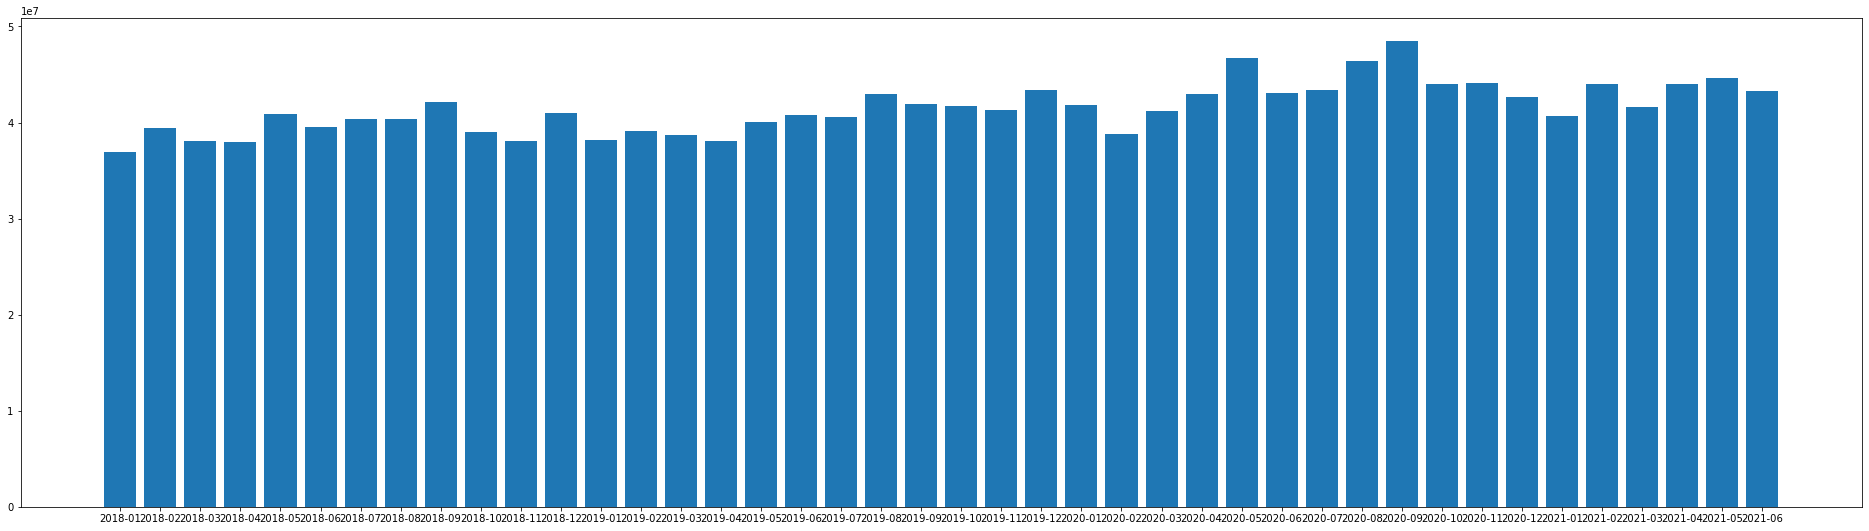

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(33,9))
#plt.style.use('seaborn-whitegrid')
#all['use_cnt']
plt.bar(all['YYYY-MM'], all['결제금액'])
plt.show()

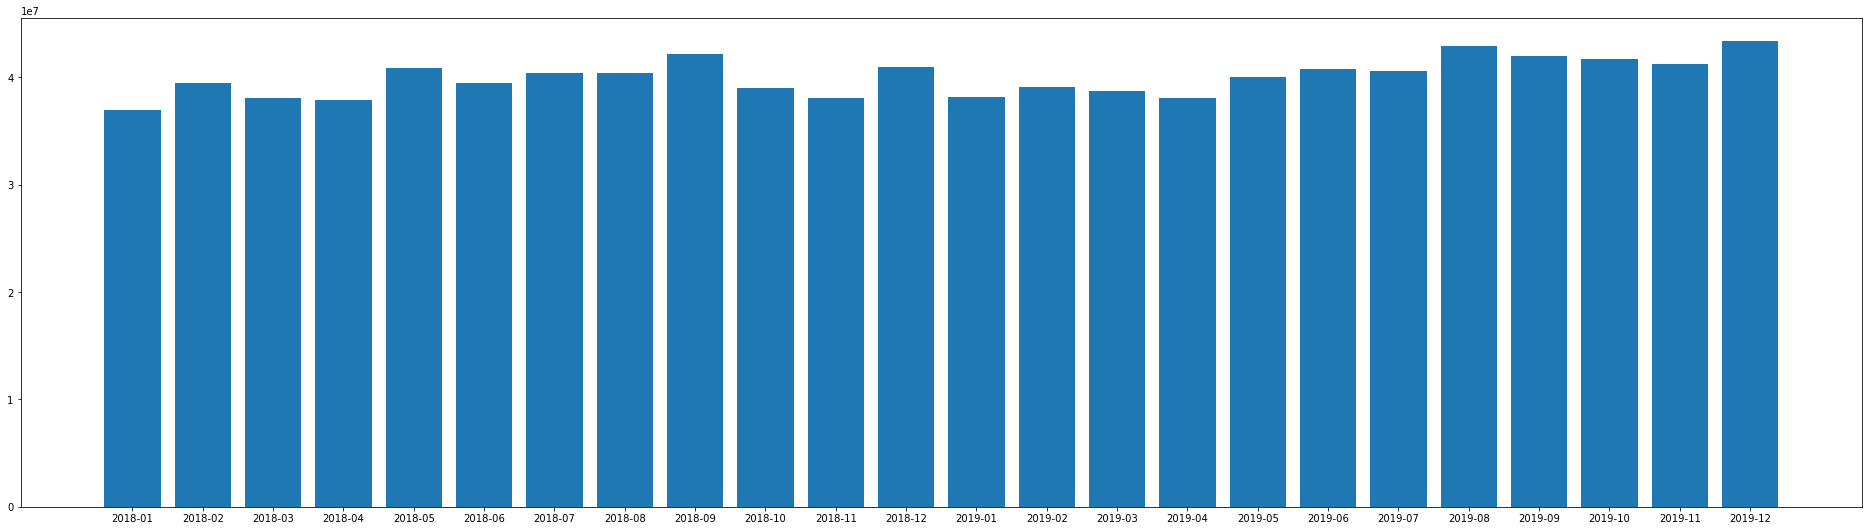

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(33,9))
#plt.style.use('seaborn-whitegrid')
#all['use_cnt']
plt.bar(코로나전['YYYY-MM'], 코로나전['결제금액'])
plt.show()

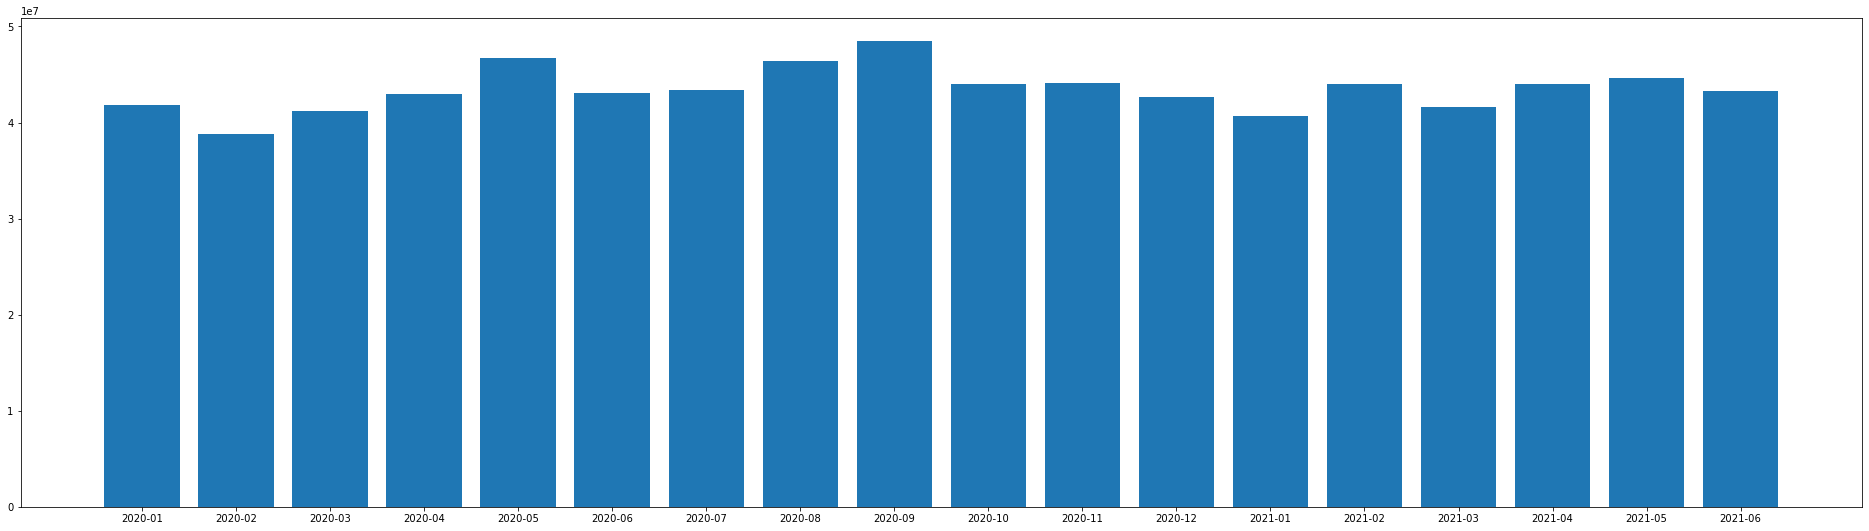

In [63]:
import matplotlib.pyplot as plt

plt.figure(figsize=(33,9))
#plt.style.use('seaborn-whitegrid')
#all['use_cnt']
plt.bar(코로나후['YYYY-MM'], 코로나후['결제금액'])
plt.show()

In [64]:
all['해수욕장 개수'] = 0

all

,YYYY-MM,행정동명,결제건수,결제금액,배출건수,배출량,총 지불금액,행정동 코드,주민등록 거주인구,외국인 거주인구,총 거주인구,시간,행정동 코드_y,거주인구,근무인구,장기 방문인구,단기 방문인구,코로나,월,해수욕장 개수
0,2018-01,건입동,183.120635,6.427583e+06,20.738739,51403.772523,1536.941441,50110590.0,4900.0,114.0,5014.0,25.128139,100221180.0,13.826490,2.623255,20.505689,18.040378,0,01,0
1,2018-01,구좌읍,133.570447,4.938732e+06,NaN,NaN,NaN,50110256.0,7787.0,276.0,8063.0,25.036467,100220512.0,22.259365,4.842035,17.729001,14.461103,0,01,0
2,2018-01,남원읍,164.892617,6.303016e+06,7.184685,31860.135135,954.033784,50130253.0,9556.0,314.0,9870.0,25.329183,100260506.0,29.339954,4.656623,23.235490,55.173826,0,01,0
3,2018-01,노형동,1192.813814,3.694071e+07,25.213448,58619.420482,1743.715992,50110660.0,26684.5,794.5,27479.0,25.490293,100221320.0,100.672886,10.138620,42.181786,43.686064,0,01,0
4,2018-01,대륜동,209.764516,7.788714e+06,27.390645,72835.145386,2119.911504,50130590.0,6736.5,89.0,6825.5,24.662384,100261180.0,11.999348,1.286292,19.460596,13.634790,0,01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1759,2021-06,표선면,140.762887,5.087587e+06,10.387440,41018.115942,1228.424155,50130320.0,6173.5,167.0,6340.5,25.356499,100260640.0,11.653956,1.177887,10.948817,0.985845,1,06,0
1760,2021-06,한경면,106.687943,3.887469e+06,4.367047,14714.600326,440.401305,50110310.0,4579.0,168.5,4747.5,24.845544,100220620.0,16.890425,0.702056,27.844214,0.481637,1,06,0
1761,2021-06,한림읍,290.491409,1.062151e+07,8.180166,26386.157526,789.633929,50110250.0,10616.0,1615.0,12231.0,25.145722,100220500.0,56.332333,3.823661,31.782092,0.894318,1,06,0
1762,2021-06,화북동,540.041935,1.607200e+07,33.193370,55625.339026,1660.486690,50110600.0,12150.0,165.0,12315.0,25.627126,100221200.0,15.133700,1.847760,8.600107,0.408654,1,06,0


In [65]:
all = all.reset_index()

In [66]:
all['행정동명'].unique()

array(['건입동', '구좌읍', '남원읍', '노형동', '대륜동', '대정읍', '대천동', '도두동', '동홍동',
       '봉개동', '삼도1동', '삼도2동', '삼양동', '서홍동', '성산읍', '송산동', '아라동', '안덕면',
       '알수없음', '애월읍', '연동', '영천동', '예래동', '오라동', '외도동', '용담1동', '용담2동',
       '이도1동', '이도2동', '이호동', '일도1동', '일도2동', '정방동', '조천읍', '중문동', '중앙동',
       '천지동', '표선면', '한경면', '한림읍', '화북동', '효돈동'], dtype=object)

In [67]:
all.loc[all["행정동명"] == "이호1동", "해수욕장 개수"] = "1" 
all.loc[all["행정동명"] == "삼양동", "해수욕장 개수"] = "1" 
all.loc[all["행정동명"] == "한림읍", "해수욕장 개수"] = "2" 
all.loc[all["행정동명"] == "애월읍", "해수욕장 개수"] = "1" 
all.loc[all["행정동명"] == "조천읍", "해수욕장 개수"] = "1" 
all.loc[all["행정동명"] == "구좌읍", "해수욕장 개수"] = "1" 
all.loc[all["행정동명"] == "표선면", "해수욕장 개수"] = "1" 
all.loc[all["행정동명"] == "안덕면", "해수욕장 개수"] = "1" 
all.loc[all["행정동명"] == "성산읍", "해수욕장 개수"] = "1" 


all

,index,YYYY-MM,행정동명,결제건수,결제금액,배출건수,배출량,총 지불금액,행정동 코드,주민등록 거주인구,...,총 거주인구,시간,행정동 코드_y,거주인구,근무인구,장기 방문인구,단기 방문인구,코로나,월,해수욕장 개수
0,0,2018-01,건입동,183.120635,6.427583e+06,20.738739,51403.772523,1536.941441,50110590.0,4900.0,...,5014.0,25.128139,100221180.0,13.826490,2.623255,20.505689,18.040378,0,01,0
1,1,2018-01,구좌읍,133.570447,4.938732e+06,NaN,NaN,NaN,50110256.0,7787.0,...,8063.0,25.036467,100220512.0,22.259365,4.842035,17.729001,14.461103,0,01,1
2,2,2018-01,남원읍,164.892617,6.303016e+06,7.184685,31860.135135,954.033784,50130253.0,9556.0,...,9870.0,25.329183,100260506.0,29.339954,4.656623,23.235490,55.173826,0,01,0
3,3,2018-01,노형동,1192.813814,3.694071e+07,25.213448,58619.420482,1743.715992,50110660.0,26684.5,...,27479.0,25.490293,100221320.0,100.672886,10.138620,42.181786,43.686064,0,01,0
4,4,2018-01,대륜동,209.764516,7.788714e+06,27.390645,72835.145386,2119.911504,50130590.0,6736.5,...,6825.5,24.662384,100261180.0,11.999348,1.286292,19.460596,13.634790,0,01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1759,1759,2021-06,표선면,140.762887,5.087587e+06,10.387440,41018.115942,1228.424155,50130320.0,6173.5,...,6340.5,25.356499,100260640.0,11.653956,1.177887,10.948817,0.985845,1,06,1
1760,1760,2021-06,한경면,106.687943,3.887469e+06,4.367047,14714.600326,440.401305,50110310.0,4579.0,...,4747.5,24.845544,100220620.0,16.890425,0.702056,27.844214,0.481637,1,06,0
1761,1761,2021-06,한림읍,290.491409,1.062151e+07,8.180166,26386.157526,789.633929,50110250.0,10616.0,...,12231.0,25.145722,100220500.0,56.332333,3.823661,31.782092,0.894318,1,06,2
1762,1762,2021-06,화북동,540.041935,1.607200e+07,33.193370,55625.339026,1660.486690,50110600.0,12150.0,...,12315.0,25.627126,100221200.0,15.133700,1.847760,8.600107,0.408654,1,06,0


In [68]:
del all['index']

In [69]:
all

,YYYY-MM,행정동명,결제건수,결제금액,배출건수,배출량,총 지불금액,행정동 코드,주민등록 거주인구,외국인 거주인구,총 거주인구,시간,행정동 코드_y,거주인구,근무인구,장기 방문인구,단기 방문인구,코로나,월,해수욕장 개수
0,2018-01,건입동,183.120635,6.427583e+06,20.738739,51403.772523,1536.941441,50110590.0,4900.0,114.0,5014.0,25.128139,100221180.0,13.826490,2.623255,20.505689,18.040378,0,01,0
1,2018-01,구좌읍,133.570447,4.938732e+06,NaN,NaN,NaN,50110256.0,7787.0,276.0,8063.0,25.036467,100220512.0,22.259365,4.842035,17.729001,14.461103,0,01,1
2,2018-01,남원읍,164.892617,6.303016e+06,7.184685,31860.135135,954.033784,50130253.0,9556.0,314.0,9870.0,25.329183,100260506.0,29.339954,4.656623,23.235490,55.173826,0,01,0
3,2018-01,노형동,1192.813814,3.694071e+07,25.213448,58619.420482,1743.715992,50110660.0,26684.5,794.5,27479.0,25.490293,100221320.0,100.672886,10.138620,42.181786,43.686064,0,01,0
4,2018-01,대륜동,209.764516,7.788714e+06,27.390645,72835.145386,2119.911504,50130590.0,6736.5,89.0,6825.5,24.662384,100261180.0,11.999348,1.286292,19.460596,13.634790,0,01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1759,2021-06,표선면,140.762887,5.087587e+06,10.387440,41018.115942,1228.424155,50130320.0,6173.5,167.0,6340.5,25.356499,100260640.0,11.653956,1.177887,10.948817,0.985845,1,06,1
1760,2021-06,한경면,106.687943,3.887469e+06,4.367047,14714.600326,440.401305,50110310.0,4579.0,168.5,4747.5,24.845544,100220620.0,16.890425,0.702056,27.844214,0.481637,1,06,0
1761,2021-06,한림읍,290.491409,1.062151e+07,8.180166,26386.157526,789.633929,50110250.0,10616.0,1615.0,12231.0,25.145722,100220500.0,56.332333,3.823661,31.782092,0.894318,1,06,2
1762,2021-06,화북동,540.041935,1.607200e+07,33.193370,55625.339026,1660.486690,50110600.0,12150.0,165.0,12315.0,25.627126,100221200.0,15.133700,1.847760,8.600107,0.408654,1,06,0


In [70]:
all.columns

Index(['YYYY-MM', '행정동명', '결제건수', '결제금액', '배출건수', '배출량', '총 지불금액', '행정동 코드',
       '주민등록 거주인구', '외국인 거주인구', '총 거주인구', '시간', '행정동 코드_y', '거주인구', '근무인구',
       '장기 방문인구', '단기 방문인구', '코로나', '월', '해수욕장 개수'],
      dtype='object')

In [71]:
del all['행정동 코드_y']

In [72]:
all

,YYYY-MM,행정동명,결제건수,결제금액,배출건수,배출량,총 지불금액,행정동 코드,주민등록 거주인구,외국인 거주인구,총 거주인구,시간,거주인구,근무인구,장기 방문인구,단기 방문인구,코로나,월,해수욕장 개수
0,2018-01,건입동,183.120635,6.427583e+06,20.738739,51403.772523,1536.941441,50110590.0,4900.0,114.0,5014.0,25.128139,13.826490,2.623255,20.505689,18.040378,0,01,0
1,2018-01,구좌읍,133.570447,4.938732e+06,NaN,NaN,NaN,50110256.0,7787.0,276.0,8063.0,25.036467,22.259365,4.842035,17.729001,14.461103,0,01,1
2,2018-01,남원읍,164.892617,6.303016e+06,7.184685,31860.135135,954.033784,50130253.0,9556.0,314.0,9870.0,25.329183,29.339954,4.656623,23.235490,55.173826,0,01,0
3,2018-01,노형동,1192.813814,3.694071e+07,25.213448,58619.420482,1743.715992,50110660.0,26684.5,794.5,27479.0,25.490293,100.672886,10.138620,42.181786,43.686064,0,01,0
4,2018-01,대륜동,209.764516,7.788714e+06,27.390645,72835.145386,2119.911504,50130590.0,6736.5,89.0,6825.5,24.662384,11.999348,1.286292,19.460596,13.634790,0,01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1759,2021-06,표선면,140.762887,5.087587e+06,10.387440,41018.115942,1228.424155,50130320.0,6173.5,167.0,6340.5,25.356499,11.653956,1.177887,10.948817,0.985845,1,06,1
1760,2021-06,한경면,106.687943,3.887469e+06,4.367047,14714.600326,440.401305,50110310.0,4579.0,168.5,4747.5,24.845544,16.890425,0.702056,27.844214,0.481637,1,06,0
1761,2021-06,한림읍,290.491409,1.062151e+07,8.180166,26386.157526,789.633929,50110250.0,10616.0,1615.0,12231.0,25.145722,56.332333,3.823661,31.782092,0.894318,1,06,2
1762,2021-06,화북동,540.041935,1.607200e+07,33.193370,55625.339026,1660.486690,50110600.0,12150.0,165.0,12315.0,25.627126,15.133700,1.847760,8.600107,0.408654,1,06,0


## all 데이터 분리

'구좌읍', '조천읍', '한경면', '한림읍', '알수없음'

In [73]:
all_unknown = all[all['행정동명'] == '알수없음']
all_unknown_idx = all[all['행정동명'] == '알수없음'].index
all_gu = all[all['행정동명']=='구좌읍']
all_gu_idx = all[all['행정동명']=='구좌읍'].index
all_jo = all[all['행정동명']=='조천읍']
all_jo_idx = all[all['행정동명']=='조천읍'].index
all_hankyung = all[all['행정동명']=='한경면']
all_hankyung_idx = all[all['행정동명']=='한경면'].index
all_hallim = all[all['행정동명']=='한림읍']
all_hallim_idx = all[all['행정동명']=='한림읍'].index

In [74]:
all.shape

(1764, 19)

In [75]:
all.drop(all_unknown_idx, inplace=True)
all.drop(all_gu_idx, inplace=True)
all.drop(all_jo_idx, inplace=True)
all.drop(all_hankyung_idx, inplace=True)
all.drop(all_hallim_idx, inplace=True)

In [76]:
all

,YYYY-MM,행정동명,결제건수,결제금액,배출건수,배출량,총 지불금액,행정동 코드,주민등록 거주인구,외국인 거주인구,총 거주인구,시간,거주인구,근무인구,장기 방문인구,단기 방문인구,코로나,월,해수욕장 개수
0,2018-01,건입동,183.120635,6.427583e+06,20.738739,51403.772523,1536.941441,50110590.0,4900.0,114.0,5014.0,25.128139,13.826490,2.623255,20.505689,18.040378,0,01,0
2,2018-01,남원읍,164.892617,6.303016e+06,7.184685,31860.135135,954.033784,50130253.0,9556.0,314.0,9870.0,25.329183,29.339954,4.656623,23.235490,55.173826,0,01,0
3,2018-01,노형동,1192.813814,3.694071e+07,25.213448,58619.420482,1743.715992,50110660.0,26684.5,794.5,27479.0,25.490293,100.672886,10.138620,42.181786,43.686064,0,01,0
4,2018-01,대륜동,209.764516,7.788714e+06,27.390645,72835.145386,2119.911504,50130590.0,6736.5,89.0,6825.5,24.662384,11.999348,1.286292,19.460596,13.634790,0,01,0
5,2018-01,대정읍,259.661290,9.383157e+06,12.859848,49097.916667,1469.851010,50130250.0,10542.5,759.0,11301.5,24.973252,58.201526,2.768244,25.222725,11.509036,0,01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1757,2021-06,중앙동,75.051471,3.038024e+06,89.766667,345189.166667,10333.483333,50130530.0,1679.0,36.0,1715.0,25.158657,8.723244,1.147834,20.408683,0.389219,1,06,0
1758,2021-06,천지동,71.375000,2.760888e+06,44.500000,131985.833333,3948.525000,50130540.0,1733.0,57.5,1790.5,23.611719,5.723360,0.352108,14.815630,0.382238,1,06,0
1759,2021-06,표선면,140.762887,5.087587e+06,10.387440,41018.115942,1228.424155,50130320.0,6173.5,167.0,6340.5,25.356499,11.653956,1.177887,10.948817,0.985845,1,06,1
1762,2021-06,화북동,540.041935,1.607200e+07,33.193370,55625.339026,1660.486690,50110600.0,12150.0,165.0,12315.0,25.627126,15.133700,1.847760,8.600107,0.408654,1,06,0


In [77]:
all.isnull().sum()

YYYY-MM      0
행정동명         0
결제건수         0
결제금액         0
배출건수         0
배출량          0
총 지불금액       0
행정동 코드       0
주민등록 거주인구    0
외국인 거주인구     0
총 거주인구       0
시간           0
거주인구         0
근무인구         0
장기 방문인구      0
단기 방문인구      0
코로나          0
월            0
해수욕장 개수      0
dtype: int64

## 전처리

In [78]:
all[['결제건수','결제금액','배출건수','배출량','총 지불금액','주민등록 거주인구','외국인 거주인구','총 거주인구','시간','거주인구','근무인구','장기 방문인구','단기 방문인구']] = all[['결제건수','결제금액','배출건수','배출량','총 지불금액','주민등록 거주인구','외국인 거주인구','총 거주인구','시간','거주인구','근무인구','장기 방문인구','단기 방문인구']].round(1)

In [79]:
all[['결제건수','결제금액','배출건수','배출량','총 지불금액','주민등록 거주인구','외국인 거주인구','총 거주인구','시간','거주인구','근무인구','장기 방문인구','단기 방문인구']] = all[['결제건수','결제금액','배출건수','배출량','총 지불금액','주민등록 거주인구','외국인 거주인구','총 거주인구','시간','거주인구','근무인구','장기 방문인구','단기 방문인구']].astype('int')

In [80]:
null_all = all[all['배출건수'].isnull()]
null_all

,YYYY-MM,행정동명,결제건수,결제금액,배출건수,배출량,총 지불금액,행정동 코드,주민등록 거주인구,외국인 거주인구,총 거주인구,시간,거주인구,근무인구,장기 방문인구,단기 방문인구,코로나,월,해수욕장 개수


In [81]:
all

,YYYY-MM,행정동명,결제건수,결제금액,배출건수,배출량,총 지불금액,행정동 코드,주민등록 거주인구,외국인 거주인구,총 거주인구,시간,거주인구,근무인구,장기 방문인구,단기 방문인구,코로나,월,해수욕장 개수
0,2018-01,건입동,183,6427583,20,51403,1536,50110590.0,4900,114,5014,25,13,2,20,18,0,01,0
2,2018-01,남원읍,164,6303015,7,31860,954,50130253.0,9556,314,9870,25,29,4,23,55,0,01,0
3,2018-01,노형동,1192,36940712,25,58619,1743,50110660.0,26684,794,27479,25,100,10,42,43,0,01,0
4,2018-01,대륜동,209,7788714,27,72835,2119,50130590.0,6736,89,6825,24,12,1,19,13,0,01,0
5,2018-01,대정읍,259,9383156,12,49097,1469,50130250.0,10542,759,11301,25,58,2,25,11,0,01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1757,2021-06,중앙동,75,3038024,89,345189,10333,50130530.0,1679,36,1715,25,8,1,20,0,1,06,0
1758,2021-06,천지동,71,2760888,44,131985,3948,50130540.0,1733,57,1790,23,5,0,14,0,1,06,0
1759,2021-06,표선면,140,5087587,10,41018,1228,50130320.0,6173,167,6340,25,11,1,10,1,1,06,1
1762,2021-06,화북동,540,16072003,33,55625,1660,50110600.0,12150,165,12315,25,15,1,8,0,1,06,0


In [82]:
all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1554 entries, 0 to 1763
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YYYY-MM    1554 non-null   object 
 1   행정동명       1554 non-null   object 
 2   결제건수       1554 non-null   int32  
 3   결제금액       1554 non-null   int32  
 4   배출건수       1554 non-null   int32  
 5   배출량        1554 non-null   int32  
 6   총 지불금액     1554 non-null   int32  
 7   행정동 코드     1554 non-null   float64
 8   주민등록 거주인구  1554 non-null   int32  
 9   외국인 거주인구   1554 non-null   int32  
 10  총 거주인구     1554 non-null   int32  
 11  시간         1554 non-null   int32  
 12  거주인구       1554 non-null   int32  
 13  근무인구       1554 non-null   int32  
 14  장기 방문인구    1554 non-null   int32  
 15  단기 방문인구    1554 non-null   int32  
 16  코로나        1554 non-null   int64  
 17  월          1554 non-null   object 
 18  해수욕장 개수    1554 non-null   object 
dtypes: float64(1), int32(13), int64(1), object(4)
me

In [83]:
all['시간'].unique()

array([25, 24, 26, 27, 23, 29, 28])

YYYY-MM : 별도의 처리 X<BR>
행정동명 : 별도의 처리 X<BR>
업종 코드 : 11개의 범주를 원핫인코딩
결제건수, 결제금액, 배출건수, 총지불금액, 인구들 : standardscaler<br>
행정동 코드 : 행정동명과 동일하므로 삭제<br>
시간 : 무의미하므로 삭제<br>

In [84]:
del all['행정동 코드']

In [85]:
del all['시간']

In [86]:
all.columns

Index(['YYYY-MM', '행정동명', '결제건수', '결제금액', '배출건수', '배출량', '총 지불금액', '주민등록 거주인구',
       '외국인 거주인구', '총 거주인구', '거주인구', '근무인구', '장기 방문인구', '단기 방문인구', '코로나', '월',
       '해수욕장 개수'],
      dtype='object')

## ALL 기준 모델링

In [87]:
all['new_yyyy_mm'] = pd.to_datetime(all['YYYY-MM'])

In [88]:
all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1554 entries, 0 to 1763
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   YYYY-MM      1554 non-null   object        
 1   행정동명         1554 non-null   object        
 2   결제건수         1554 non-null   int32         
 3   결제금액         1554 non-null   int32         
 4   배출건수         1554 non-null   int32         
 5   배출량          1554 non-null   int32         
 6   총 지불금액       1554 non-null   int32         
 7   주민등록 거주인구    1554 non-null   int32         
 8   외국인 거주인구     1554 non-null   int32         
 9   총 거주인구       1554 non-null   int32         
 10  거주인구         1554 non-null   int32         
 11  근무인구         1554 non-null   int32         
 12  장기 방문인구      1554 non-null   int32         
 13  단기 방문인구      1554 non-null   int32         
 14  코로나          1554 non-null   int64         
 15  월            1554 non-null   object        
 16  해수욕장 개

In [89]:
all.drop('YYYY-MM', axis=1, inplace=True)
all.set_index('new_yyyy_mm', inplace=True)

In [90]:
all.index

DatetimeIndex(['2018-01-01', '2018-01-01', '2018-01-01', '2018-01-01',
               '2018-01-01', '2018-01-01', '2018-01-01', '2018-01-01',
               '2018-01-01', '2018-01-01',
               ...
               '2021-06-01', '2021-06-01', '2021-06-01', '2021-06-01',
               '2021-06-01', '2021-06-01', '2021-06-01', '2021-06-01',
               '2021-06-01', '2021-06-01'],
              dtype='datetime64[ns]', name='new_yyyy_mm', length=1554, freq=None)

In [91]:
all.index.unique()

DatetimeIndex(['2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01'],
              dtype='datetime64[ns]', name='new_yyyy_mm', freq=None)

In [92]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
all['행정동명'] = le.fit_transform(all['행정동명'])

In [93]:
all

,행정동명,결제건수,결제금액,배출건수,배출량,총 지불금액,주민등록 거주인구,외국인 거주인구,총 거주인구,거주인구,근무인구,장기 방문인구,단기 방문인구,코로나,월,해수욕장 개수
new_yyyy_mm,,,,,,,,,,,,,,,,
2018-01-01,0,183,6427583,20,51403,1536,4900,114,5014,13,2,20,18,0,01,0
2018-01-01,1,164,6303015,7,31860,954,9556,314,9870,29,4,23,55,0,01,0
2018-01-01,2,1192,36940712,25,58619,1743,26684,794,27479,100,10,42,43,0,01,0
2018-01-01,3,209,7788714,27,72835,2119,6736,89,6825,12,1,19,13,0,01,0
2018-01-01,4,259,9383156,12,49097,1469,10542,759,11301,58,2,25,11,0,01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-01,32,75,3038024,89,345189,10333,1679,36,1715,8,1,20,0,1,06,0
2021-06-01,33,71,2760888,44,131985,3948,1733,57,1790,5,0,14,0,1,06,0
2021-06-01,34,140,5087587,10,41018,1228,6173,167,6340,11,1,10,1,1,06,1
